# Online Retail store sales prediction using Exponential moving average.

In [2]:
import pandas as pd

In [3]:
# we already have processed data from when we tried Simple moving average.. directly importing that 
df = pd.read_csv('online_retail_daily_sales.csv')

In [4]:
df.head()

,Date,price
0,2010-12-01,58635.56
1,2010-12-02,46207.28
2,2010-12-03,45620.46
3,2010-12-05,31383.95
4,2010-12-06,53860.18


we have the daily sales here.

In [64]:
df['predicted']  = df['price'].ewm(span=8).mean()

In [65]:
df

,Date,price,predicted,error
0,2010-12-01,58635.56,58635.560000,0.000000
1,2010-12-02,46207.28,51644.652500,4142.760000
2,2010-12-03,45620.46,49116.364456,2026.962857
3,2010-12-05,31383.95,42901.494197,7589.620667
4,2010-12-06,53860.18,46305.686118,7203.198065
...,...,...,...,...
300,2011-12-05,57751.32,50524.140916,8684.436742
301,2011-12-06,54228.37,51347.302935,2580.743371
302,2011-12-07,75076.22,56620.395616,11714.296685
303,2011-12-08,81417.78,62130.925479,9027.928343


<Axes: >

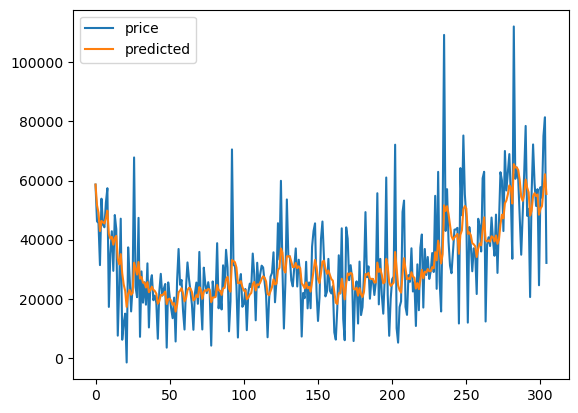

In [66]:
df[['price','predicted']].plot()

In [67]:
df['error'] = abs(df['predicted'] - df['price'])

In [68]:
df

,Date,price,predicted,error
0,2010-12-01,58635.56,58635.560000,0.000000
1,2010-12-02,46207.28,51644.652500,5437.372500
2,2010-12-03,45620.46,49116.364456,3495.904456
3,2010-12-05,31383.95,42901.494197,11517.544197
4,2010-12-06,53860.18,46305.686118,7554.493882
...,...,...,...,...
300,2011-12-05,57751.32,50524.140916,7227.179084
301,2011-12-06,54228.37,51347.302935,2881.067065
302,2011-12-07,75076.22,56620.395616,18455.824384
303,2011-12-08,81417.78,62130.925479,19286.854521


we can see errors in each of the case.
Lets find out the errors for predictions in the nov of 2011

In [69]:
df.dtypes

Date         datetime64[ns]
price               float64
predicted           float64
error               float64
dtype: object

In [70]:
df['Date'] = pd.to_datetime(df['Date'])

In [71]:
df.dtypes

Date         datetime64[ns]
price               float64
predicted           float64
error               float64
dtype: object

In [72]:
import datetime as datetime

In [73]:
df_dec_2011 = df[(df['Date'].dt.month == 11) & (df['Date'].dt.year==2011)].reset_index(drop=True)

In [74]:
df_dec_2011.head()

,Date,price,predicted,error
0,2011-11-01,28741.55,38596.296956,9854.746956
1,2011-11-02,45239.06,40072.466521,5166.593479
2,2011-11-03,62816.55,45126.707294,17689.842706
3,2011-11-04,60081.76,48450.052340,11631.707660
4,2011-11-06,42912.40,47219.462931,4307.062931


In [75]:
df_dec_2011['per_error'] = abs(((df_dec_2011['price']-df['predicted'])/df_dec_2011['price'])*100)
df_dec_2011.head()

,Date,price,predicted,error,per_error
0,2011-11-01,28741.55,38596.296956,9854.746956,104.009735
1,2011-11-02,45239.06,40072.466521,5166.593479,14.159429
2,2011-11-03,62816.55,45126.707294,17689.842706,21.809834
3,2011-11-04,60081.76,48450.052340,11631.707660,28.594811
4,2011-11-06,42912.40,47219.462931,4307.062931,7.907472


In [76]:
mean_absolute_per_error = df_dec_2011['per_error'].mean()
median_absolute_per_error = df_dec_2011['per_error'].median()

print(f'Mean Absolute Percent Error: {mean_absolute_per_error}')
print(f'Median Absolute Percent Error: {median_absolute_per_error}')

Mean Absolute Percent Error: 38.50298171966217
Median Absolute Percent Error: 30.800683982663873


RESULTS:

Span : 0.6
- Mean Absolute Percent Error: 39.59555954849642
- Median Absolute Percent Error: 32.95310724764302

Span : 0.3
- Mean Absolute Percent Error: 42.21715092761273
- Median Absolute Percent Error: 35.511296695493975

Span : 0.8

- Mean Absolute Percent Error: 38.50298171966217
- Median Absolute Percent Error: 30.800683982663873



In [77]:
df_dec_2011

,Date,price,predicted,error,per_error
0,2011-11-01,28741.55,38596.296956,9854.746956,104.009735
1,2011-11-02,45239.06,40072.466521,5166.593479,14.159429
2,2011-11-03,62816.55,45126.707294,17689.842706,21.809834
3,2011-11-04,60081.76,48450.052340,11631.707660,28.594811
4,2011-11-06,42912.40,47219.462931,4307.062931,7.907472
5,2011-11-07,70001.08,52282.044502,17719.035498,34.358312
6,2011-11-08,56647.66,53252.181279,3395.478721,19.718808
7,2011-11-09,62599.43,55329.347662,7270.082338,24.460108
8,2011-11-10,68956.24,58357.545959,10598.694041,27.784262
9,2011-11-11,54835.51,57574.871302,2739.361302,23.544545


Still error is very high because of some months have shooting up.

There is some trend and seasonality in the data that cannot be captured by this model.

Have to move to better models.